In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('~/data/kobe/data.csv')
data = data[data.shot_made_flag.notnull()].reset_index()
features = ['combined_shot_type', 'period', 'playoffs', 'seconds_remaining', 'minutes_remaining', 'season',
          'shot_distance', 'shot_made_flag', 'shot_zone_area', 'game_date', 'matchup', 'loc_x', 'loc_y', 'action_type']
dataset = data[features]

In [3]:
dataset['total_seconds_remaining'] = 60*dataset['minutes_remaining'] + dataset['seconds_remaining']
dataset.drop('minutes_remaining', axis=1, inplace=True)
dataset.drop('seconds_remaining', axis=1, inplace=True)
dataset['month'] = dataset['game_date'].map(lambda x: x.split('-')[1])
dataset.drop('game_date', axis=1, inplace=True)
dataset['home'] = dataset['matchup'].str.contains('vs').astype('int')
dataset.drop('matchup', axis=1, inplace=True)

How does shot frequency vary with number of seconds remaining in the quarter? Pretty intuitive, gradual increase in shot frequency as the quarter comes to a close, and big increase right at the end.

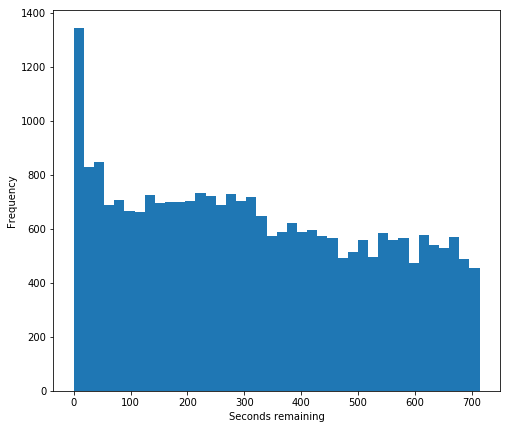

In [4]:
fig, ax = plt.subplots(figsize=(8,7))
ax.hist(dataset.total_seconds_remaining, bins=40)
ax.set_ylabel('Frequency')
ax.set_xlabel('Seconds remaining')
plt.show()

## Court Position and Shot Type Analysis

For the x-coordinate, shot frequency increases massively directly in front of the hoop, small peaks to the left and right, larger on right due to dominant right hand? (Check which direction corresponds to which). For the y-coordinate, shot frequency peaks right next to the hoop, and then at a sweet spot further away (probably for 3 pointers).

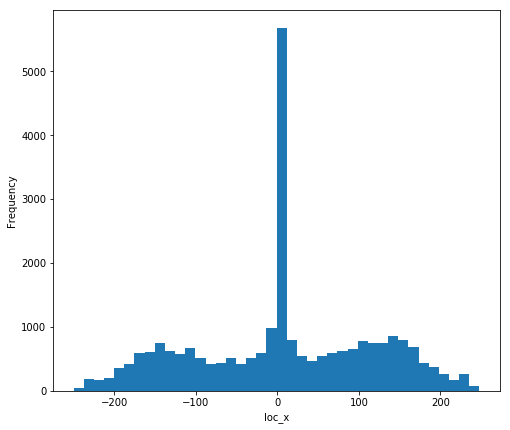

In [5]:
fig, ax = plt.subplots(figsize=(8,7))
ax.hist(dataset.loc_x, bins=40)
plt.ylabel('Frequency')
plt.xlabel('loc_x')
plt.show()

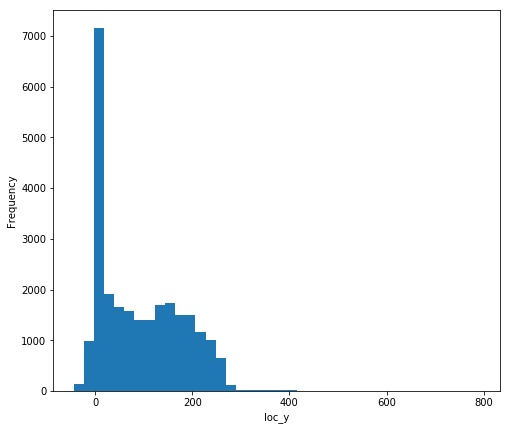

In [6]:
fig, ax = plt.subplots(figsize=(8,7))
ax.hist(dataset.loc_y, bins=40)
plt.ylabel('Frequency')
plt.xlabel('loc_y')
plt.show()

Visualizing shots based on position and whether the shot was successful or not. Can visualise 'hotspots' of successful shots.

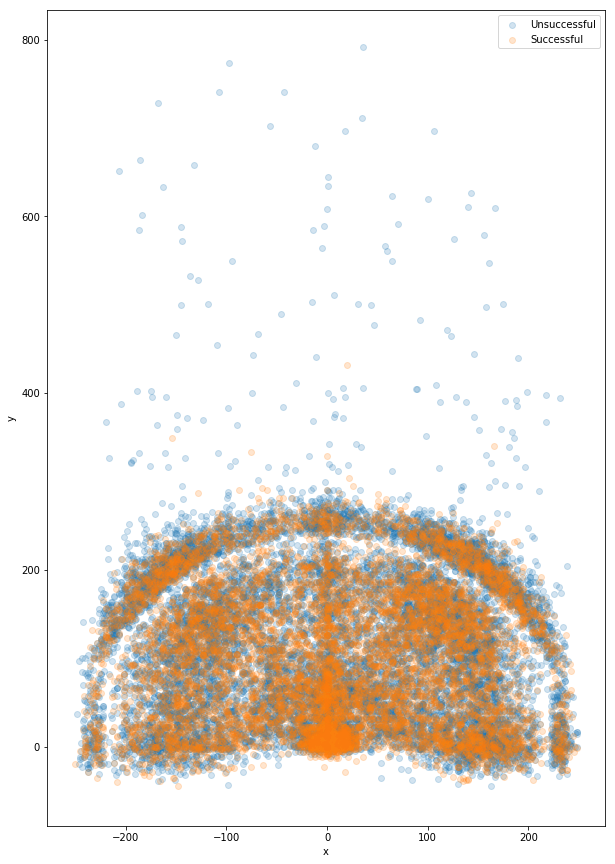

In [7]:
fig, ax = plt.subplots(figsize=(10,15))
groups = dataset.groupby('shot_made_flag')
names = ['Unsuccessful', 'Successful']
for name, group in groups:
    ax.scatter(x=group.loc_x, y=group.loc_y, alpha=0.2, label=names[int(name)])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

Visualising the difference between successful and unsuccessful shots, broken down by shot type. Many more unsuccessful shots than successful ones! Successful shots taken from less far away, and possibly more tightly focused on those hotspots. Additionally some types of shots clearly dominate more than others, almost all jump shots and layups.

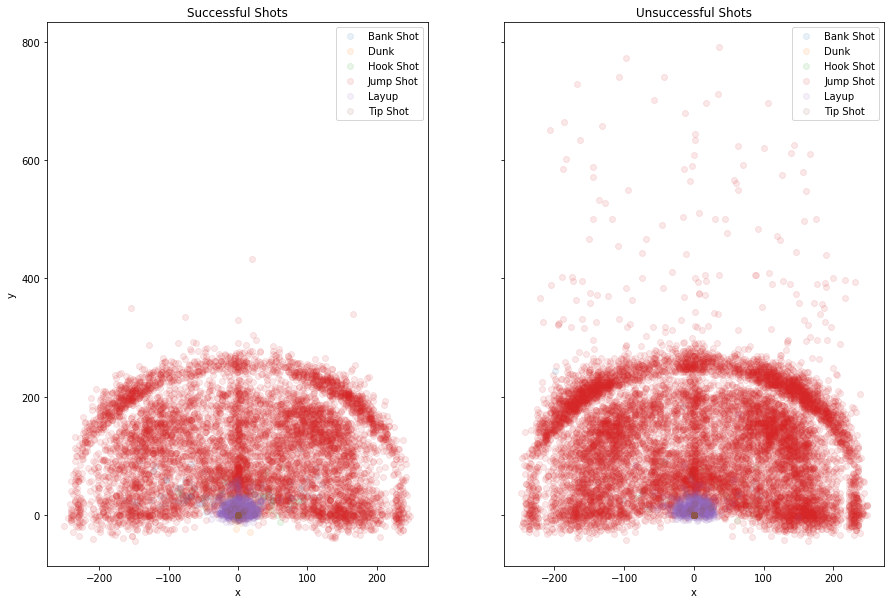

In [12]:
fig, ax = plt.subplots(1,2, sharey='row', figsize=(15,10))

shots_made = dataset[dataset['shot_made_flag']==1]
shots_not_made = dataset[dataset['shot_made_flag']==0]

groups = shots_made.groupby('combined_shot_type')
for name, group in groups:
    ax[0].plot(group.loc_x, group.loc_y, label=name, marker='o', linestyle='', alpha=0.1)

    
groups = shots_not_made.groupby('combined_shot_type')
for name, group in groups:
    ax[1].plot(group.loc_x, group.loc_y, label=name, marker='o', linestyle='', alpha=0.1)

ax[0].set_ylabel('y')
ax[0].set_xlabel('x')
ax[0].set_title('Successful Shots')
ax[1].set_title('Unsuccessful Shots')
ax[1].set_xlabel('x')
ax[0].legend()
ax[1].legend()
plt.show()

Looking at what kind of shots were successful and what kind were not, based on the percentage chance of having a successful shot grouped by `combined_shot_type`, it seems like there is a big variation in shot success probability, e.g. Dunks are very successful!

In [9]:
groups = dataset.groupby('combined_shot_type')['shot_made_flag']
(groups.sum()/groups.count()).sort_values(ascending=False)

combined_shot_type
Dunk         0.928030
Bank Shot    0.791667
Layup        0.565093
Hook Shot    0.535433
Jump Shot    0.391071
Tip Shot     0.348684
Name: shot_made_flag, dtype: float64

In [10]:
groups = dataset.groupby('action_type')['shot_made_flag']
(groups.sum()/groups.count()).sort_values(ascending=False)

action_type
Turnaround Finger Roll Shot        1.000000
Hook Bank Shot                     1.000000
Driving Floating Bank Jump Shot    1.000000
Running Slam Dunk Shot             1.000000
Reverse Slam Dunk Shot             1.000000
Slam Dunk Shot                     0.982036
Driving Slam Dunk Shot             0.976744
Driving Dunk Shot                  0.976654
Alley Oop Dunk Shot                0.947368
Reverse Dunk Shot                  0.918033
Follow Up Dunk Shot                0.900000
Fadeaway Bank shot                 0.888889
Running Dunk Shot                  0.888889
Driving Finger Roll Layup Shot     0.881356
Running Hook Shot                  0.878788
Driving Finger Roll Shot           0.852941
Running Bank shot                  0.837209
Finger Roll Layup Shot             0.821429
Turnaround Bank shot               0.793103
Dunk Shot                          0.778802
Jump Bank Shot                     0.775087
Running Jump Shot                  0.747112
Driving Reverse Layu